### 정규표현식 
- 나만의 일정한 규칙( 패턴 ) 만들 수 있다.
- 복잡한, 다양한 문자열 속에서 내가 원하는 문자만 추출하고 싶거나, 내가 원하는 패턴만 추출하고 싶은 경우가 꼭 생긴다.
- 기존 문자열 함수를 이용해서 추출하는데 한계가 있다.
- str문법이나, 기존 문자열 문법으로 사용해도 한계가 있다.
- 따라서 분석가가 어떤 상황에 따라 다르겠지만, 문자열 함수로만 풀 수 없는 상황이 있는 경우는 정규식 패턴을 이용해서 전처리 또는 추출을 할 수 있다.


In [4]:
import re
#정규표현식 패키지
#re match, search 두 가지 방법이 있다.

In [5]:
# ('패턴', 뒤에 있는 것이 문자열)
re.match('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [6]:
re.match('ab', 'ab, Hello, world!')

<re.Match object; span=(0, 2), match='ab'>

- 내가원하는 패턴을 만들 수 있어야 한다.
- Hello 다양한 것들을 찾을 수 있다.
- 이메일 
- asdfadsf@기업명.net, com 등등
- 패턴이 발생한다.
- 이 패턴에 대해서 정규표현식으로 만들엇
- 로우데이터에서 이메일만 찾거나, 이메일이 형식 맞는지 등을 체크할 수 있다.


- match
- search 

In [9]:
re.match('Hello', 'ab Hello') #match는 Hello를 못 찾는다.

In [8]:
re.search('Hello', 'ab Hello') #찾는다.

<re.Match object; span=(3, 8), match='Hello'>

- match 게으른 녀석
- search 부지런한 녀석

### 패턴을 만들기 위한 여러가지 특수문자들이 있다.

- 숫자패턴의 경우는 [0-9] ,전체 모든 숫자를 뜻한다.

In [11]:
#숫자 데이터만 찾고싶다.
re.search('[0-9]','12345, hihihi')

# 나는 전체 12345를 찾고 싶은데?
# 너는 1만 찾았네?

<re.Match object; span=(0, 1), match='1'>

- 패턴을 확장하기 위해서 사용하는 특수문자

- '*'

- '+'

- 숫자에 대해서 0개 이상 있는지 1개 이상있는지에 따라 모든 숫자를 찾아달라는 뜻

In [12]:
#숫자 데이터만 찾고싶다.
re.search('[0-9]*','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

In [13]:
re.search('[0-9]+','12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

### 필수과제 1
- '*'
- '+'

- 둘의 차이를 찾아서 코드 작성하고, 주석처리 부탁드립니다.

- 문자{개수}
- (문자열){개수}

In [14]:
re.match('a{5}','aaaaaa10')

<re.Match object; span=(0, 5), match='aaaaa'>

In [16]:
re.match('(hi){5}','hihihihihi1234')

<re.Match object; span=(0, 10), match='hihihihihi'>

### 전화번호 패턴은 어떤 식으로 만들까?
- 000-0000-0000 이런 식으로
- 모든숫자(3개) -모든숫자(4개) - 모든숫자(4개)

In [19]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}','010-1234-56781')

<re.Match object; span=(0, 13), match='010-1234-5678'>

In [20]:
re.match('[0-9]*-[0-9]*-[0-9]*','010-1234-56781')

<re.Match object; span=(0, 14), match='010-1234-56781'>

### 문자 ( 알파벳 )
- a-z 모든 알파벳 소문자
- A-Z 모든 알파벳 대문자

- A-z 

In [26]:
re.match('[a-z]*','hihi1234')

# 1234도 찾아줘
re.match('[a-z0-9]*','hihiHI1234')


<re.Match object; span=(0, 4), match='hihi'>

In [27]:
re.search('[a-z0-9]*','hihiHI1234')

<re.Match object; span=(0, 4), match='hihi'>

In [25]:
re.match('[a-zA-Z0-9]*','hihiHI1234')

<re.Match object; span=(0, 10), match='hihiHI1234'>

- 한국어
- 가-힣 #모든 한글
- ㄱ-ㅎ
- ㅏ-ㅣ 
- 따로 사용할 수 있다.

In [31]:
re.search('[가-힣]+','www.python.org/안녕하세요?')

<re.Match object; span=(15, 20), match='안녕하세요'>

- 특수문자도 만들어 줘야 한다!

- 특수문자 앞에 \ 붙이면 된다.
- 단 []안에서는 \붙이지 않아도 되지만 혹시나 에러가 발생하는 경우는 \
- \특수문자

In [33]:
re.search('\?+', '?안녕!')

<re.Match object; span=(0, 1), match='?'>

- 좀 더 쉽게 요약을해서 표현하는 경우가 있다.

- 자주 사용하는 것은 요약해서 표현한다.
- \d 모든 숫자
- \D 모든 숫자를 제외한다
- not [^0-9] 모든 문자를 제외한 것

- \w [a-zA-Z0-9_] 영문, 대소문자, 숫자, 밑줄 문자
- \W [^a-zA-Z0-9_] 위에 \w제외한 나머지 다

In [34]:
re.match('\d+','12345')

<re.Match object; span=(0, 5), match='12345'>

In [36]:
re.match('\w+','12345abcd')

<re.Match object; span=(0, 9), match='12345abcd'>

- 공백을 처리하기
- \s 또는 \S

In [38]:
re.match('[a-zA-Z0-9\s]+', 'hi 12345')

<re.Match object; span=(0, 8), match='hi 12345'>

### 그룹사용하기
- (정규표현식)(정규표현식)

In [39]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abc')

In [41]:
ab.group(1)

'1234'

In [42]:
ab.group(2)

'abc'

In [43]:
ab.group(0)

'1234 abc'

### 이메일을 찾는 정규표현식 만들어보기!

- 1. 영어소문자,숫자만 가능 
- 2. 대문자는 불가능하다.
- 3. 문자열로 시작해야 한다.
- 4. @기업명.com 으로 끝난다.
- 5. 기업명에는 문자열만 들어간다.

In [47]:
'python@gmail.com' #찾아보기 

'python@gmail.com'

In [48]:
re.match('[a-z0-9]*@[a-z]*.[a-z]{3}','python@gmail.com')

<re.Match object; span=(0, 16), match='python@gmail.com'>

In [49]:
re.search('[a-z]*[0-9]*@[a-z]*.com','python@gmai.com')

<re.Match object; span=(0, 15), match='python@gmai.com'>

### 필수과제2
- 정규표현식 수업시간에 배우지 않는 것 최소 5개 이상 찾아주시고, 해당 정규표현식 코드 작성 및 주석으로 어떤 원리로 작동하는지 체크해 주세요!

## 텍스트 분석

- 문자열, 텍스트에 대한 데이터 분석
- 문자열이라는 것은 문자라서 -> 컴퓨터에 학습시키 위해서는 수치화해야 한다.
- 카운팅기반으로 진행하거나, 빈도에 대한 것으로 수치화를 한다.
- word2vec bag 결국에는 다 카운팅 기반, 빈도기반으로 진행한다.

- 원핫인코딩, 레이블인코딩, 인코딩 등을 진행해서 문자를 수치화 해야 한다.
- 텍스트 분석은 
- 빈도, 감성분석, 예측, 시각화, 자연어처리로 챗봇 등 
- 텍스트라는 것을 어떻게 수치화 할 것인가? 중요한 포인트이다.

- ' 여러분 안녕하세요? 잘 지내셨나요? 피곤하시죠? ' 
- 주어, 동사, 형용사, 구성성분으로 나눠서 수치화 하는 것
- 이 문자를 어떤 기준으로 텍스트를 수치화 할 것인가?

- 패키지가 잘 되어 있따.
- 영어, 한국어 konlp 를 이용해서 형태소처리 할 수 있다.
- 영어 nltk, okt, twitter 다양하다.

- 자연어 처리 토큰화 모듈
- 자연어처리 토큰화 모듈

- From nltk.tokenize import sent_tokenize
- From konlpy.tag import Hannaum
- From knolpy.tag import Kkma
- From konlpy.tag import Okt
- from konlpy.tag import Mecab

In [72]:
import pandas as pd

survey = pd.read_csv('survey_설문지.csv')

In [73]:
# 문자열데이터라는 것이 단순하게 문자열 데이터만 구성되어 있으면 조금 분석에 한정적일 수 있다.
# 문자열데이터 + 평점, 고객의 리뷰에 대한 수치화된 데이터들이 있으면 분석이 다채로워진다.
# 시계열 데이터가 붙어버리면 엄청난 추가분석의 가능성 -> 시계열적인 리뷰수 증가 기타 등등

survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [55]:
survey['comment']
# 정규식을 가지고 영어는 제외하고 한글만 모두 다 남기자!

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

### str 문법을 사용해서 전처리를 진행한다.
- str 기본적으로 다양한 문자열 처리할 수 있는 함수가 있다.
- replace, contains 등등 다양하다.

In [74]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [85]:
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"", regex=True)  #regex 

In [87]:
survey['comment']

0              역앞에 젊은이들이 모여있다(역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [81]:
survey['len'] = survey['comment'].str.len() # 전체 리뷰에 대한 길이를 만들 수 있다.

In [82]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1,19.0
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21.0
2,2019-02-18,육아 지원이 좋다,5,9.0
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,26.0
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11.0
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22.0
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26.0
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15.0
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14.0


In [83]:
import matplotlib.pyplot as plt

(array([19., 18., 21., 11.,  7.,  3.,  3.,  1.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

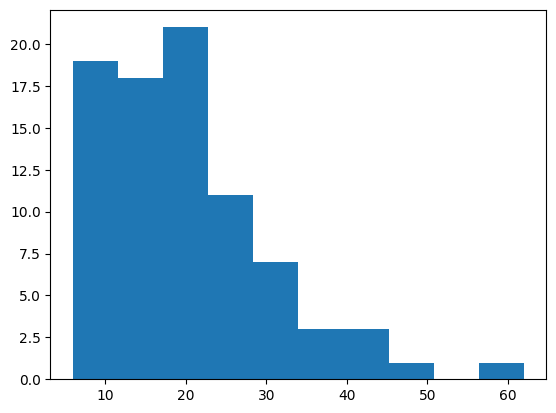

In [84]:
plt.hist(survey['len'])

## 필수과제 3
- 서베이 데이터 가지고 간단한 시각화 및 전처리 
- 정규표현식을 가지고 한글만 남기고 모두 다 삭제해 주시고
- 만족도에 따른 분석도, 시계열에 따른 분석도 가능하다.
- 두 가지 컬럼을 가지고 텍스트를 분석해 보기
- 시각화 + 분석 내용을 요약